CNN with added layers

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from glob import glob

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = './data/chest_xray_1/train/'
test_dir = './data/chest_xray_1/test/'

In [3]:
f_model = Sequential()

In [4]:
f_model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
f_model.add(MaxPooling2D((2,2)))
f_model.add(Convolution2D(32,(3,3),activation = 'relu'))
f_model.add(MaxPooling2D((2,2)))
f_model.add(Flatten())
f_model.add(Dense(units=128,activation='relu'))
f_model.add(Dense(units=128,activation='relu'))
f_model.add(Dense(units=1, activation='sigmoid'))
f_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('./data/chest_xray_1/train/', target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory('./data/chest_xray_1/test/',target_size=(64,64),batch_size=32,class_mode='binary')
history = f_model.fit_generator(training_set, epochs=20, validation_data=test_set)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/Users/andrewmoy/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
163/163 [==============================] - 98s 596ms/step - loss: 0.4983 - accuracy: 0.7727 - val_loss: 0.4162 - val_accuracy: 0.8045
Epoch 2/20
163/163 [==============================] - 97s 593ms/step - loss: 0.2526 - accuracy: 0.8954 - val_loss: 0.4268 - val_accuracy: 0.8269
Epoch 3/20
163/163 [==============================] - 99s 606ms/step - loss: 0.2105 - accuracy: 0.9127 - val_loss: 0.3227 - val_accuracy: 0.8718
Epoch 4/20
163/163 [==============================] - 99s 610ms/step - loss: 0.1719 - accuracy: 0.9255 - val_loss: 0.3400 - val_accuracy: 0.8686
Epoch 5/20
163/163 [==============================] - 97s 594ms/step - loss: 0.1829 - accuracy: 0.9298 - val_loss: 0.4485 - val_accuracy: 0.8446
Epoch 6/20
163/163 [==============================] - 107s 658ms/step - loss: 0.1636 - accuracy: 0.9409 - val_loss: 0.2830 - val_accuracy: 0.8942
Epoch 7/20
163/163 [==============================] - 100s 611ms/step - loss: 0.1377 - accuracy: 0.9491 - val_loss: 0.4592 - val_

In [8]:
f_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

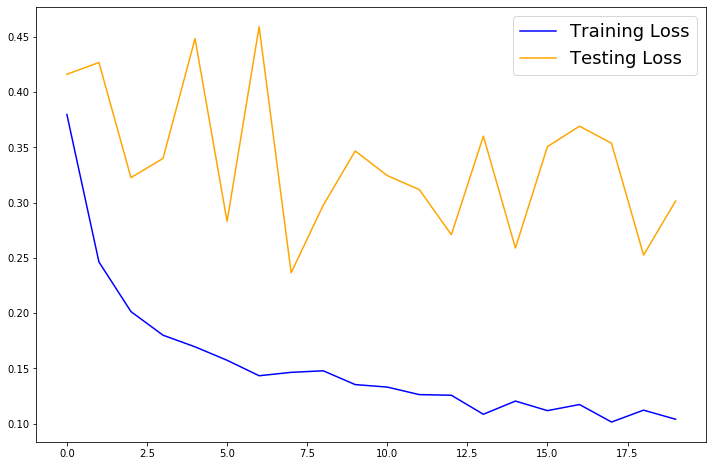

In [9]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
# Generate line plot of training, testing loss over epochs.
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='orange')
plt.legend(fontsize = 18);

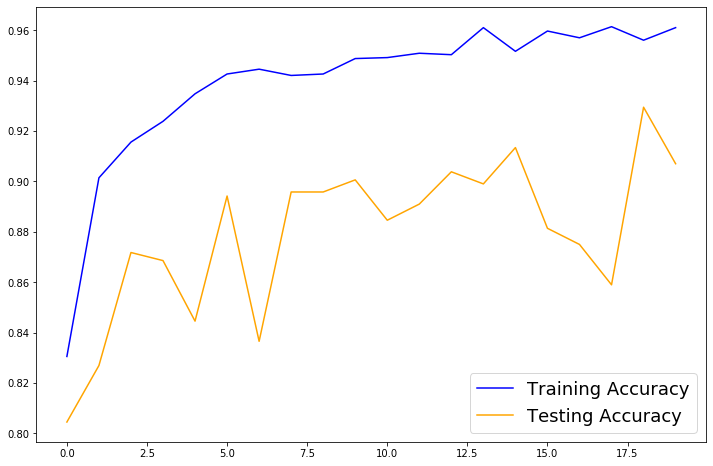

In [10]:
# Check out our train accuracy and test accuracy over epochs.
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
# Generate line plot of training, testing loss over epochs.
plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')
plt.legend(fontsize = 18);